# Problem Statement

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
df=pd.read_excel('Election_Data.xlsx','Election_Dataset_Two Classes')

### Sample of the dataset

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


### Shape of the dataset

In [4]:
df.shape

(1525, 10)

### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


### Datatype for each Variable

In [6]:
pd.DataFrame(df.dtypes,columns=['Datatype'])

,Datatype
Unnamed: 0,int64
vote,object
age,int64
economic.cond.national,int64
economic.cond.household,int64
Blair,int64
Hague,int64
Europe,int64
political.knowledge,int64
gender,object


### Missing values in the dataset

In [7]:
pd.DataFrame(df.isnull().sum(),columns=['No.of null Values'])

,No.of null Values
Unnamed: 0,0
vote,0
age,0
economic.cond.national,0
economic.cond.household,0
Blair,0
Hague,0
Europe,0
political.knowledge,0
gender,0


### Checking for duplicates

**First column "Unnamed: 0" is the only column with unique identity in the dataset. So, we can check the duplicates based on that column**

In [8]:
df.duplicated(subset=['Unnamed: 0']).sum()

0

**The first column "Unnamed:0"  is of no use for our further evaluation. We can drop the column**

In [9]:
df=df.drop('Unnamed: 0',axis=1)

In [10]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [11]:
df.shape

(1525, 9)

* There are 1525 rows and 9 columns(excluding the column"Unnamed: 0") in the dataset.
* age,economic.cond.national,economic.cond.household,Blair,Hague,Europe and political.knowledge are numerical variable.
* Vote and gender are categorical variable.
* There are no null values present in the dataset.
* There are no duplicate values in the dataset

### EDA

### Statistical Summary

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The above table shows the statistical summary of the dataset**
* The age of voters ranges from 24 to 93 years and the mean age is 53 years
* The economic.cond.national of the voters is an ordinal variable ranges from 1 to 5.The mean values is 3.
* The economic.cond.household of the voters is an ordinal variable ranges from 1 to 5.The mean values is 3.
* The Blair is an ordinal variable ranges from 1 to 5.The mean values is 4.
* The Hague is an ordinal variable ranges from 1 to 5.The mean values is 2.
* The Europe is a ordinal variable ranges from 1 to 11.The mean values is 6.
* The political.knowledge is a ordinal variable ranges from 0 to 3.The mean values is 2.
* The variable vote has 2 unique classes and most frequent is "Labour".
* The variable gender has 2 unique classes and most frequent is "female".

### Univariate Analysis

In [13]:
df_num=df.drop(['vote','gender'],axis=1)

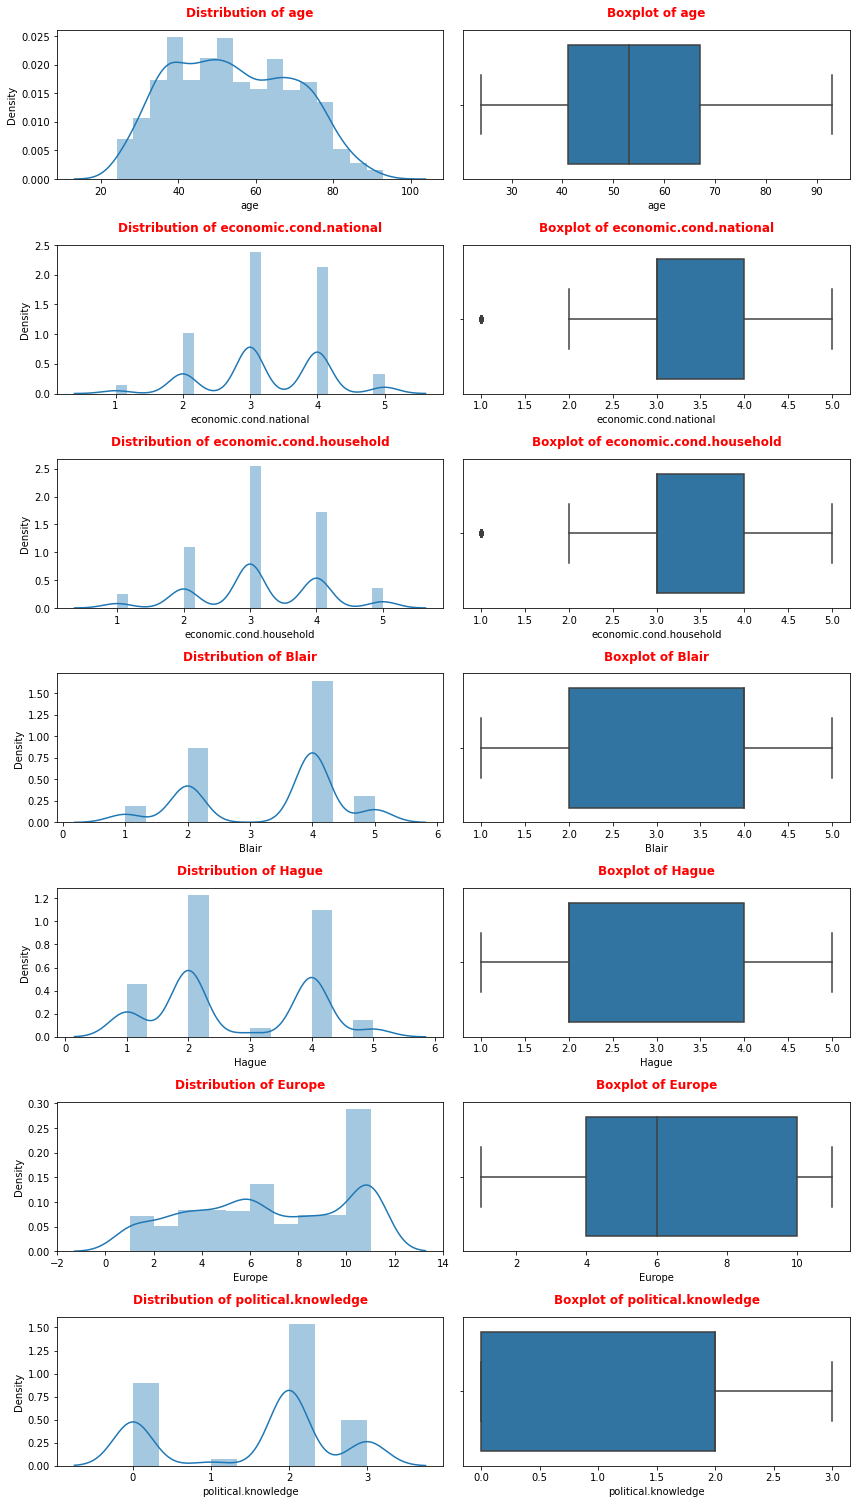

In [14]:
plt.figure(figsize=(12,21))
for i in range(len(df_num.columns)):
    plt.subplot(7,2,(2*i)+1)
    sns.distplot(df_num[df_num.columns[i]])
    plt.title('Distribution of {}'.format(df_num.columns[i]),weight='bold',color='red',y=1.05)
    plt.subplot(7,2,(2*i)+2)
    sns.boxplot(df_num[df_num.columns[i]])
    plt.title('Boxplot of {}'.format(df_num.columns[i]),weight='bold',color='red',y=1.05)
    plt.tight_layout()

### Skewness of the data

In [15]:
for i in range(len(df_num.columns)):
    print('Skewness of',df_num.columns[i], '=', round(df_num[df_num.columns[i]].skew(),2))

Skewness of age = 0.14
Skewness of economic.cond.national = -0.24
Skewness of economic.cond.household = -0.15
Skewness of Blair = -0.54
Skewness of Hague = 0.15
Skewness of Europe = -0.14
Skewness of political.knowledge = -0.43


**From the above graphs we can observe**
* Distribution of age is almost symmetrical(very less skew value) and have no outliers
* The economic.cond.national of the voters is a ordinal variable and its mode value is 3
* The economic.cond.household of the voters is a ordinal variable rangesand its mode value is 3
* The Blair is a ordinal variable and its mode value is 4
* The Hague is a ordinal and its mode value is 2
* The Europe is a ordinal variable and its mode value is 11
* The political.knowledge is a ordinal variable and its mode value is 2

In [16]:
df_cat=df[['vote','gender']]

In [17]:
df_cat.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [18]:
df_cat.gender.value_counts()

female    812
male      713
Name: gender, dtype: int64

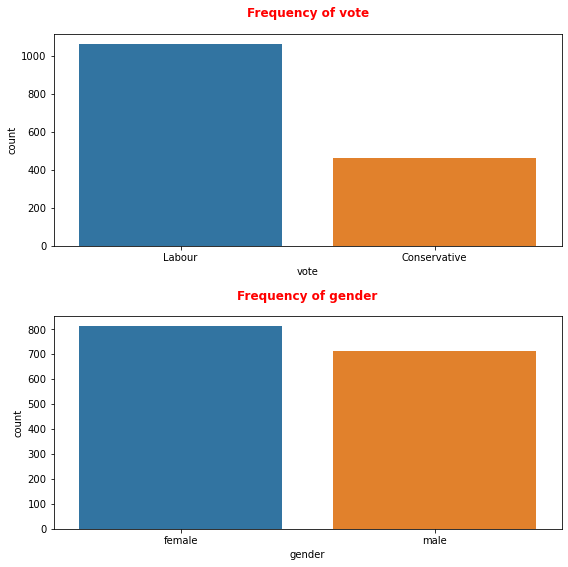

In [19]:
plt.figure(figsize=(8,8))
for i in range(len(df_cat.columns)):
    plt.subplot(2,1,i+1)
    sns.countplot(df[df_cat.columns[i]])
    plt.title('Frequency of {}'.format(df_cat.columns[i]),weight='bold',color='red',y=1.05)
    plt.tight_layout()
    

**From the above plots we can observe that**

* Most of the voters are voted for "Labour" party than "Conservative" party.
* Data is somewhat balanced, having considerble data points for both the gender classes.

### Bivariate Analysis

### Pairplot

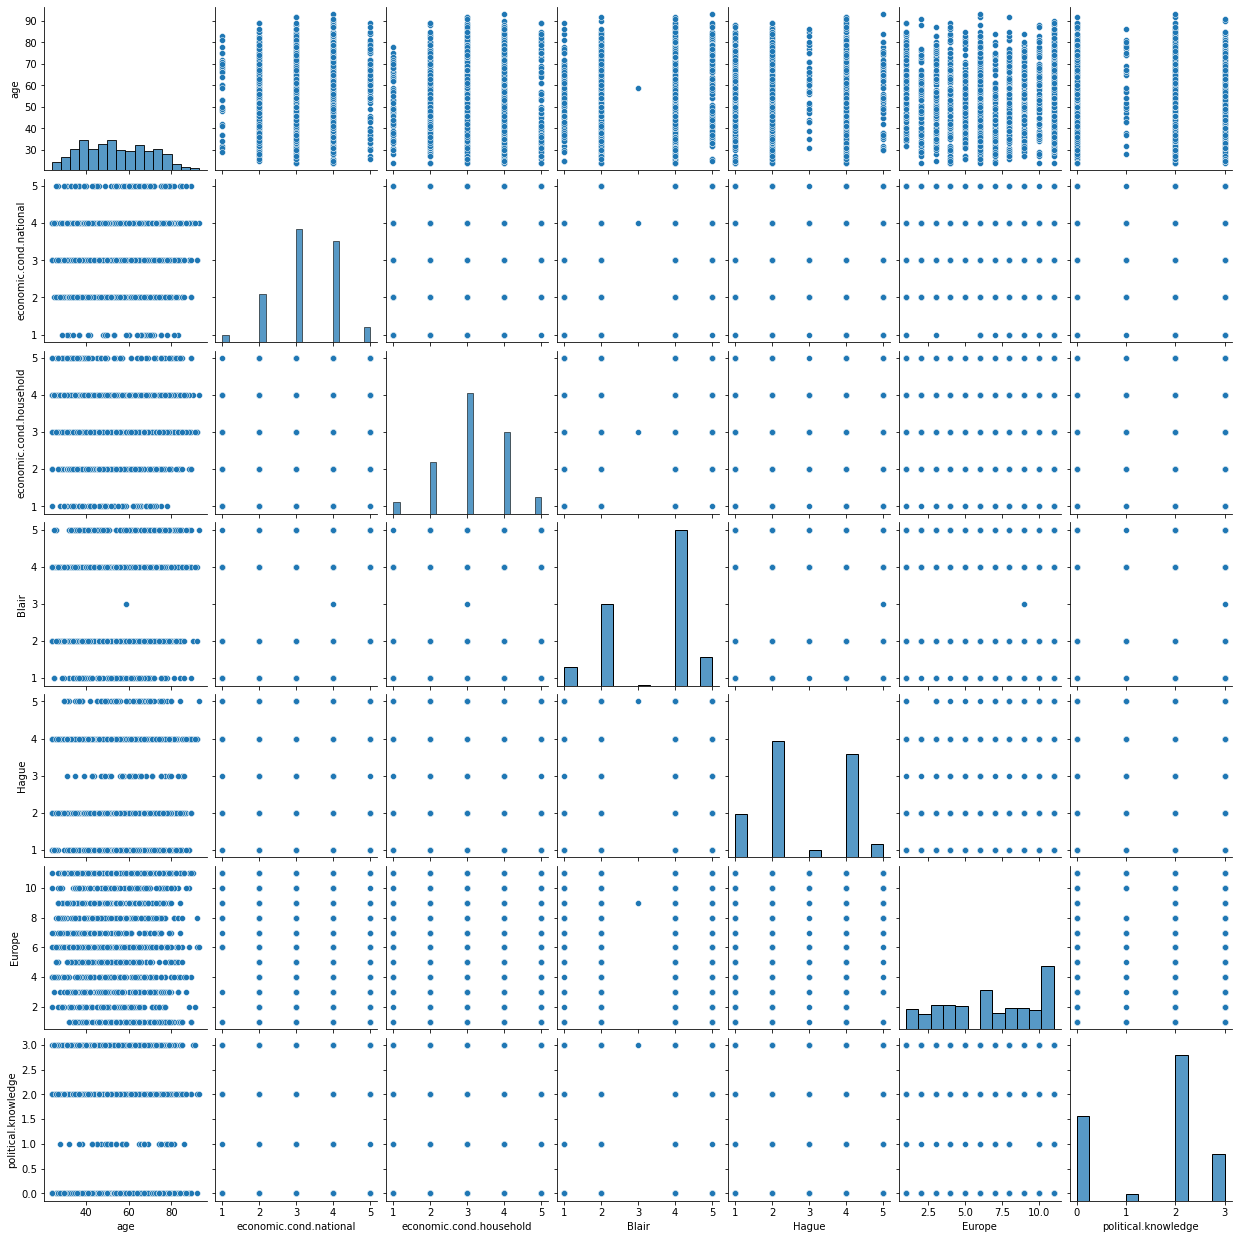

In [20]:
sns.pairplot(df);

**Above pair plot shows the relationship between each variables to other variables. The values of correlation can be explained clearly with the help of heat map.**

### Heatmap

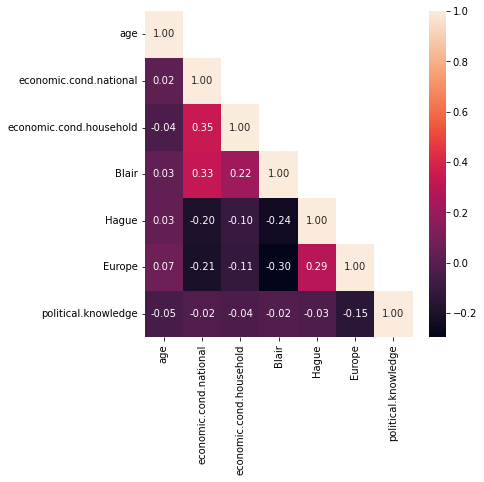

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',mask=np.triu(df.corr(),1));

**From the above heatmap we can observe that**
* There is a week positive co-relation between the variable economic.cond.national & economic.cond.household.
* There is a week positive co-relation between the variable economic.cond.national & Blair.
* There is no other significant co-relation between any of the variables.

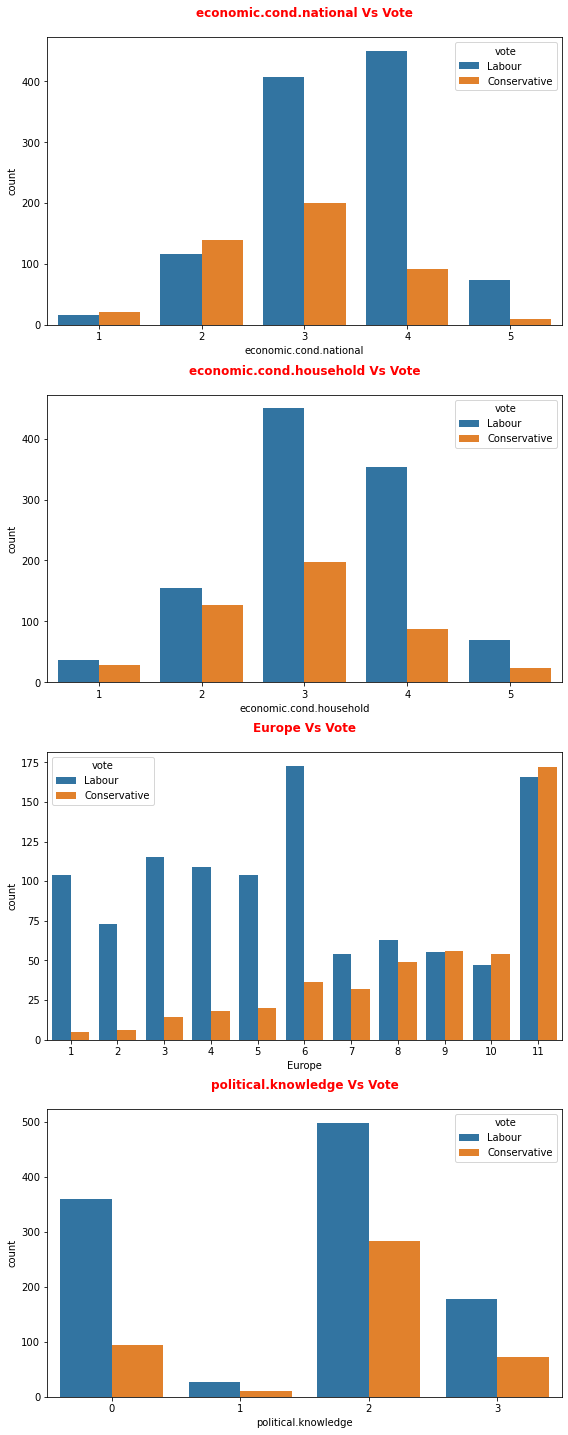

In [22]:
plt.figure(figsize=(8,20))
plt.subplot(4,1,1)
sns.countplot(df['economic.cond.national'],hue=df.vote);
plt.title('economic.cond.national Vs Vote',weight= 'bold',color='red',y=1.05)
plt.subplot(4,1,2)
sns.countplot(df['economic.cond.household'],hue=df.vote);
plt.title('economic.cond.household Vs Vote',weight= 'bold',color='red',y=1.05)
plt.subplot(4,1,3)
sns.countplot(df['Europe'],hue=df.vote);
plt.title('Europe Vs Vote',weight= 'bold',color='red',y=1.05)
plt.subplot(4,1,4)
sns.countplot(df['political.knowledge'],hue=df.vote);
plt.title('political.knowledge Vs Vote',weight= 'bold',color='red',y=1.05)
plt.tight_layout()

**From the above graphs we can observe that**
* Voters with high national economic condition mostly voted for mostly Labour party and the voters with low national economic condition almost equally voted to both parties.
* Voters from all household economic conditions mostly voted for Labour Party.
* Voters with high 'Eurosceptic’ sentiment almost equally voted for both the parties.
* Voters with low 'Eurosceptic’ sentiment mostly voted for Labour party.
* Voters with low and high political.knowledge mostly voted for Labour party.

In [23]:
m=pd.crosstab(df['vote'],df['economic.cond.national'],margins=True,margins_name='Total',normalize=True)
m.loc["% Conservative"]=(m.iloc[0]/(m.iloc[0]+ m.iloc[1]))*100
m.loc["% Labour"]=(m.iloc[1]/(m.iloc[0]+ m.iloc[1]))*100
round(m,2)



economic.cond.national,1,2,3,4,5,Total
vote,,,,,,
Conservative,0.01,0.09,0.13,0.06,0.01,0.3
Labour,0.01,0.08,0.27,0.30,0.05,0.7
Total,0.02,0.17,0.40,0.36,0.05,1.0
% Conservative,56.76,54.47,32.95,16.97,10.98,30.3
% Labour,43.24,45.53,67.05,83.03,89.02,69.7


In [24]:
m=pd.crosstab(df['vote'],df['economic.cond.national'],margins=True,margins_name='Total',normalize=True)
m.loc['% Conservative']=(m.iloc[0]/(m.iloc[0]+m.iloc[1]))*100
m.loc['% Labour']=(m.iloc[1]/(m.iloc[0]+m.iloc[1]))*100
round(m,3)

economic.cond.national,1,2,3,4,5,Total
vote,,,,,,
Conservative,0.014,0.092,0.131,0.060,0.006,0.303
Labour,0.010,0.077,0.267,0.295,0.048,0.697
Total,0.024,0.169,0.398,0.355,0.054,1.000
% Conservative,56.757,54.475,32.949,16.974,10.976,30.295
% Labour,43.243,45.525,67.051,83.026,89.024,69.705


In [25]:
m=pd.crosstab(df['vote'],df['economic.cond.household'],margins=True,margins_name='Total',normalize=True)
m.loc['% Conservative']=(m.iloc[0]/(m.iloc[0]+m.iloc[1]))*100
m.loc['% Labour']=(m.iloc[1]/(m.iloc[0]+m.iloc[1]))*100
round(m,3)

economic.cond.household,1,2,3,4,5,Total
vote,,,,,,
Conservative,0.018,0.083,0.130,0.057,0.015,0.303
Labour,0.024,0.101,0.295,0.231,0.045,0.697
Total,0.043,0.184,0.425,0.289,0.060,1.000
% Conservative,43.077,45.000,30.556,19.773,25.000,30.295
% Labour,56.923,55.000,69.444,80.227,75.000,69.705


In [26]:
m=pd.crosstab(df['vote'],df['Europe'],margins=True,margins_name='Total',normalize=True)
m.loc['% Conservative']=(m.iloc[0]/(m.iloc[0]+m.iloc[1]))*100
m.loc['% Labour']=(m.iloc[1]/(m.iloc[0]+m.iloc[1]))*100
round(m,3)

Europe,1,2,3,4,5,6,7,8,9,10,11,Total
vote,,,,,,,,,,,,
Conservative,0.003,0.004,0.009,0.012,0.013,0.024,0.021,0.032,0.037,0.035,0.113,0.303
Labour,0.068,0.048,0.075,0.071,0.068,0.113,0.035,0.041,0.036,0.031,0.109,0.697
Total,0.071,0.052,0.085,0.083,0.081,0.137,0.056,0.073,0.073,0.066,0.222,1.000
% Conservative,4.587,7.595,10.853,14.173,16.129,17.225,37.209,43.750,50.450,53.465,50.888,30.295
% Labour,95.413,92.405,89.147,85.827,83.871,82.775,62.791,56.250,49.550,46.535,49.112,69.705


### Label Encoding

In [27]:
df.gender=np.where(df.gender=='female',0,df.gender)
df.gender=np.where(df.gender=='male',1,df.gender)

Label encoding has been done for categorical variable “gender”

In [28]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [30]:
df.gender=df.gender.astype('int')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   int32 
dtypes: int32(1), int64(7), object(1)
memory usage: 101.4+ KB


### Scaling

**Scaling is nescesscary for distance based algorithms like KNN,Clustering,etc. Also we need to scale the data for algorithms like Linear Regression,Logistic Regression & ANN which uses gradient descent. Scaling helps gradient descent to converge and reach the global minima quickly.**

**We don't need to scale the data for LDA and other Tree based algorithms. Here we can use scaled data for KNN, Logistic Regression and unscaled data for LDA & other tree based algorithms.**

In [32]:
a=pd.DataFrame(df.var(),columns=['Variance'])
a['Standard Deviation']=df.std()
a

,Variance,Standard Deviation
age,246.842075,15.711209
economic.cond.national,0.776107,0.880969
economic.cond.household,0.864810,0.929951
Blair,1.380212,1.174824
Hague,1.514631,1.230703
Europe,10.873759,3.297538
political.knowledge,1.173571,1.083315
gender,0.249110,0.499109


**From the above table we can see that**

* Age is the only continous variable which have more vairance comapared to others.
* All other ordinal variables have similar variances within feature. It seems scaling does not impact much on performances of the model.

### Splitting the data into train and test data (70:30)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=df.drop('vote',axis=1) # Independent Variables
y=df.pop('vote') # Dependent variable

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1, stratify=y)

In [36]:
pd.DataFrame(x_train)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1493,34,3,1,4,2,6,2,0
1431,42,3,4,4,4,3,2,0
235,36,4,4,4,2,7,2,0
1078,64,4,3,2,1,4,2,1
735,37,4,4,4,2,2,3,1
...,...,...,...,...,...,...,...,...
531,78,4,4,2,2,6,2,0
624,33,2,4,2,2,11,3,0
515,44,4,3,4,3,4,2,1
545,76,4,2,2,2,3,3,1


In [37]:
pd.DataFrame(x_test)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1317,32,3,4,4,4,9,0,1
229,68,2,3,5,2,8,0,0
609,84,4,2,4,1,4,3,0
24,60,3,2,4,4,2,2,0
1479,79,4,4,5,1,3,3,1
...,...,...,...,...,...,...,...,...
1287,85,2,3,4,2,11,3,1
780,61,5,4,4,1,1,2,0
636,39,2,2,4,1,10,2,1
664,43,3,2,2,4,9,2,1


In [38]:
pd.DataFrame(y_train)

,vote
1493,Labour
1431,Labour
235,Labour
1078,Labour
735,Labour
...,...
531,Labour
624,Conservative
515,Conservative
545,Labour


In [39]:
pd.DataFrame(y_test)

,vote
1317,Labour
229,Labour
609,Labour
24,Conservative
1479,Labour
...,...
1287,Labour
780,Labour
636,Labour
664,Conservative


In [40]:
y_train.value_counts(normalize=True)

Labour          0.697282
Conservative    0.302718
Name: vote, dtype: float64

In [41]:
y_test.value_counts(normalize=True)

Labour          0.696507
Conservative    0.303493
Name: vote, dtype: float64

**As we are going to use scaled data for some algorithms, below are the scaled datasets for x_train,y_train**

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc=StandardScaler()

In [44]:
#Scale the training data
x_train_scaled=sc.fit_transform(x_train)
pd.DataFrame(x_train_scaled)

,0,1,2,3,4,5,6,7
0,-1.266219,-0.275172,-2.306413,0.558590,-0.646129,-0.203865,0.431470,-0.926760
1,-0.757323,-0.275172,0.928832,0.558590,0.991447,-1.122980,0.431470,-0.926760
2,-1.138995,0.849765,0.928832,0.558590,-0.646129,0.102507,0.431470,-0.926760
3,0.642142,0.849765,-0.149583,-1.149191,-1.464917,-0.816608,0.431470,1.079027
4,-1.075383,0.849765,0.928832,0.558590,-0.646129,-1.429352,1.357786,1.079027
...,...,...,...,...,...,...,...,...
1062,1.532710,0.849765,0.928832,-1.149191,-0.646129,-0.203865,0.431470,-0.926760
1063,-1.329831,-1.400109,0.928832,-1.149191,-0.646129,1.327994,1.357786,-0.926760
1064,-0.630099,0.849765,-0.149583,0.558590,0.172659,-0.816608,0.431470,1.079027
1065,1.405486,0.849765,-1.227998,-1.149191,-0.646129,-1.122980,1.357786,1.079027


In [45]:
#Apply the transformation on the test data
x_test_scaled=sc.transform(x_test)
pd.DataFrame(x_test_scaled)

,0,1,2,3,4,5,6,7
0,-1.393443,-0.275172,0.928832,0.558590,0.991447,0.715250,-1.421161,1.079027
1,0.896590,-1.400109,-0.149583,1.412481,-0.646129,0.408878,-1.421161,-0.926760
2,1.914382,0.849765,-1.227998,0.558590,-1.464917,-0.816608,1.357786,-0.926760
3,0.387693,-0.275172,-1.227998,0.558590,0.991447,-1.429352,0.431470,-0.926760
4,1.596322,0.849765,0.928832,1.412481,-1.464917,-1.122980,1.357786,1.079027
...,...,...,...,...,...,...,...,...
453,1.977994,-1.400109,-0.149583,0.558590,-0.646129,1.327994,1.357786,1.079027
454,0.451305,1.974702,0.928832,0.558590,-1.464917,-1.735724,0.431470,-0.926760
455,-0.948159,-1.400109,-1.227998,0.558590,-1.464917,1.021622,0.431470,1.079027
456,-0.693711,-0.275172,-1.227998,-1.149191,0.991447,0.715250,0.431470,1.079027


### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [47]:
lr=LogisticRegression() # Running the LogisticRegression with default values

In [48]:
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [49]:
y_train_predict=lr.predict(x_train_scaled)
y_test_predict=lr.predict(x_test_scaled)
y_train_predict_prob=lr.predict_proba(x_train_scaled)
y_test_predict_prob=lr.predict_proba(x_test_scaled)

In [50]:
from sklearn.metrics import accuracy_score

### Performance check for Logistic Regression model (Default model)

### Confusion Matrix base model (Train data)

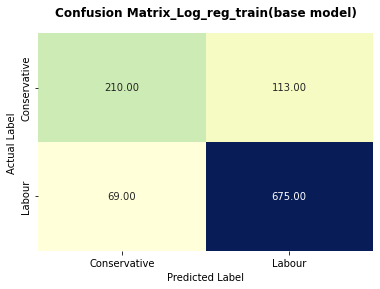

In [51]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),fmt='.2f',cbar=False,annot=True,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix_Log_reg_train(base model)',weight='bold',y=1.05)
plt.show()

### Classification report base model (Train data)

In [52]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

Conservative       0.75      0.65      0.70       323
      Labour       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



### Confusion Matrix base model (Test data)

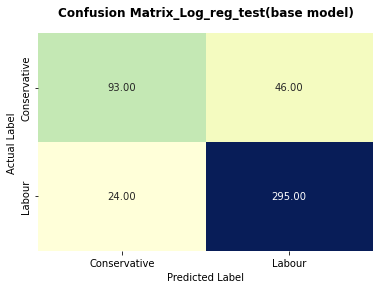

In [53]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),fmt='.2f',cbar=False,annot=True,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix_Log_reg_test(base model)',weight='bold',y=1.05)
plt.show()

### Classification report base model (Test data)

In [54]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

Conservative       0.79      0.67      0.73       139
      Labour       0.87      0.92      0.89       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.84      0.85      0.84       458



**From the above classification reports we can observe that**

The accuracy for both train & test data are 83 % and 85% respectively. Other metrics like recall,precision and f1-score for both test & train data are within the differnce of 10%. So the model seems a good fit model and performs similar way in both train & test data.

### Model tuning for Logistic Regression

We are using Grid Serach CV to find the best parameter values to the model, such a way model gives the better results. we can try out with different solvers,tol values and without penalty & l2 penalty.

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
LogisticRegression()

LogisticRegression()

In [57]:
grid={'penalty':['l2','l1','elasticnet','none'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.001,0.0001,0.00001]}

**Initially taking below values for Grid Search Cross Validation**

 * penalty=l1,l2,elaticnet,none
 
 * solver = 'sag','lbfgs','newton-cg','saga' 
 
 * tol = [0.001,0.0001,0.00001] (Trying default value 0.0001 and slightly lesser value and slightly higher value. Very less tol value consumes more time. So tol value should be optimum.)

In [58]:
lr_tuned=LogisticRegression(max_iter=1000)

In [59]:
Grid_Search=GridSearchCV(estimator=lr_tuned,param_grid=grid,cv=3,scoring='accuracy')

In [60]:
Grid_Search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'penalty': ['l2', 'l1', 'elasticnet', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy')

In [61]:
print(Grid_Search.best_params_)

{'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}


**Best Parameters for Logistic Regression**

* penalty=l1
* solver = saga
* tol = 0.0001

In [62]:
lr_best=Grid_Search.best_estimator_

In [63]:
y_train_predict_best=lr_best.predict(x_train_scaled)
y_test_predict_best=lr_best.predict(x_test_scaled)
y_train_predict_prob_best=lr_best.predict_proba(x_train_scaled)
y_test_predict_prob_best=lr_best.predict_proba(x_test_scaled)

### Performance check for Logistic Regression  (Tuned model)

### Confusion_matrix tuned model (Train data)

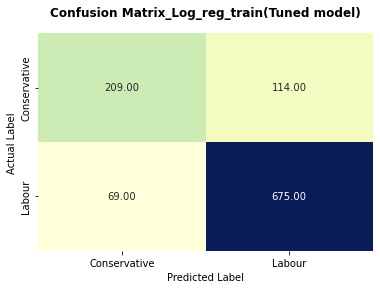

In [64]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_train_predict_best),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),fmt='.2f',cbar=False,annot=True,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix_Log_reg_train(Tuned model)',weight='bold',y=1.05)
plt.show()

### Classification report tuned model (Train data)

In [65]:
print(classification_report(y_train,y_train_predict_best))

              precision    recall  f1-score   support

Conservative       0.75      0.65      0.70       323
      Labour       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



### Confusion matrix tuned model (Test data)

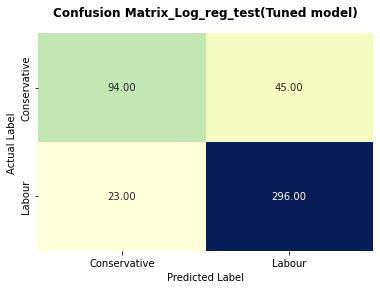

In [66]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_predict_best),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),fmt='.2f',cbar=False,annot=True,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix_Log_reg_test(Tuned model)',weight='bold',y=1.05)
plt.show()

### Classification report tuned model (Test data)

In [67]:
print(classification_report(y_test,y_test_predict_best))

              precision    recall  f1-score   support

Conservative       0.80      0.68      0.73       139
      Labour       0.87      0.93      0.90       319

    accuracy                           0.85       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.85      0.85       458



**Observations from confusion Matrix and Classification report for both Base & Tuned model**

* Both base model and tuned model gives the exactly same prediction in both test and trained data.Even though we have used different solver and tol value, got the same result.

* Actual vote is for "Conservative" party, there are 46 instances where model predicted that the vote is for "Labour" party in test dataset.

* Actual vote is for "Labour" party, there are 24 instances where model predicted that the vote is for "Conservative" party in test dataset.

* In our business problem accuracy is important. Both base and tuned models gives the same accuracy in test data and trained data. It shows that model performed similarly at both test & train data. Model is neither a overfit nor a underfit.

* In case of Logistic Regression,we can go with base model since it is simple one also gives the same results like tuned model.

### ROC_Curve base model (Train data)

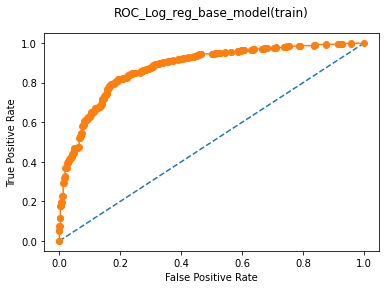

In [68]:
lr_fpr,lr_tpr,tresholds=roc_curve(y_train,y_train_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_fpr,lr_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Log_reg_base_model(train)',y=1.05)
plt.show()

### ROC_Curve base model(Test data)

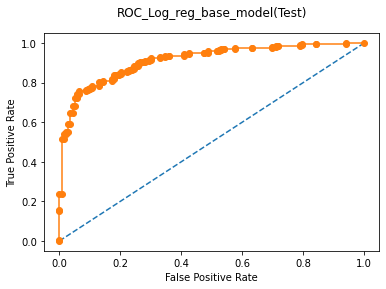

In [69]:
lr_fpr,lr_tpr,tresholds=roc_curve(y_test,y_test_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_fpr,lr_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Log_reg_base_model(Test)',y=1.05)
plt.show()

### ROC_Curve tuned model (Train data)

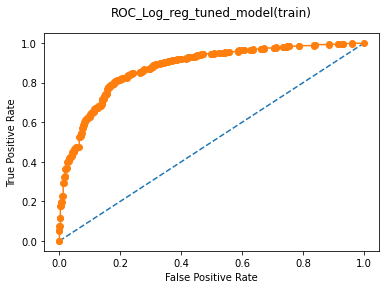

In [70]:
lr_best_fpr,lr_best_tpr,tresholds=roc_curve(y_train,y_train_predict_prob_best[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_best_fpr,lr_best_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Log_reg_tuned_model(train)',y=1.05)
plt.show()

### ROC_Curve tuned model (Test data)

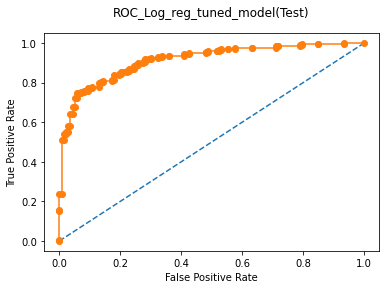

In [71]:
lr_best_fpr,lr_best_tpr,tresholds=roc_curve(y_test,y_test_predict_prob_best[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_best_fpr,lr_best_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Log_reg_tuned_model(Test)',y=1.05)
plt.show()

In [72]:
print('Area Under the Curve for Base Model (train data) is',round(roc_auc_score(y_train,y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for Base Model (test data) is',round(roc_auc_score(y_test,y_test_predict_prob[:,1]),2)*100,'%')

print('Area Under the Curve for Tuned Model (train data) is',round(roc_auc_score(y_train,y_train_predict_prob_best[:,1]),2)*100,'%')
print('Area Under the Curve for Tuned Model (test data) is',round(roc_auc_score(y_test,y_test_predict_prob_best[:,1]),2)*100,'%')

Area Under the Curve for Base Model (train data) is 88.0 %
Area Under the Curve for Base Model (test data) is 91.0 %
Area Under the Curve for Tuned Model (train data) is 88.0 %
Area Under the Curve for Tuned Model (test data) is 91.0 %


### LDA (Linear Discriminant Analysis)

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
lda=LinearDiscriminantAnalysis() #Running the LDA with default values

In [75]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [76]:
lda_y_train_predict=lda.predict(x_train)
lda_y_test_predict=lda.predict(x_test)
lda_y_train_predict_prob=lda.predict_proba(x_train)
lda_y_test_predict_prob=lda.predict_proba(x_test)

### Performance check for LDA base model

### Confusion matrix LDA base model (Train)

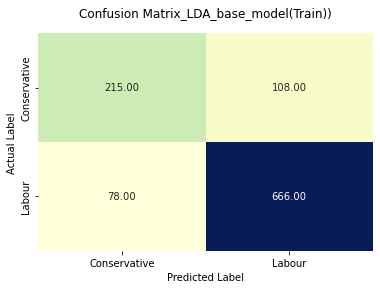

In [77]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,lda_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix_LDA_base_model(Train))',y=1.05)
plt.show()

### Classification report for LDA base model(Train)

In [78]:
print(classification_report(y_train,lda_y_train_predict))

              precision    recall  f1-score   support

Conservative       0.73      0.67      0.70       323
      Labour       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



### Confusion matrix LDA base model (Test)

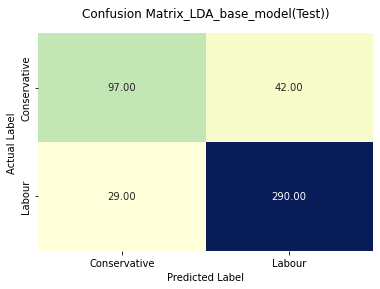

In [79]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,lda_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix_LDA_base_model(Test))',y=1.05)
plt.show()

### Classification report for LDA base model(Test)

In [80]:
print(classification_report(y_test,lda_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.77      0.70      0.73       139
      Labour       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



**From the above classification reports we can observe that**

The accuracy for both train & test data 83% and 84% respectively.Other metrics like recall,precision and f1-score for both test & train data are also almost similar.So the model seems a good fit model and performs similar way in both train & test data.

### Model Tuning for LDA

We are using Grid Serach CV to find the best parameter values to the model, such a way model gives the better results. we can try out with different solvers,tolerance values.

In [81]:
grid_lda={'solver':['svd','lsqr','eigen'],
            'tol':[0.001,0.0001,0.00001,0.000001]}

In [82]:
lda1=LinearDiscriminantAnalysis()

In [83]:
GridSearch=GridSearchCV(estimator=lda1,param_grid=grid_lda,cv = 3,scoring='accuracy')

In [84]:
GridSearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05, 1e-06]},
             scoring='accuracy')

In [85]:
GridSearch.best_params_

{'solver': 'svd', 'tol': 0.001}

**Best Parameters for LDA**

* solver = svd
* tol = 0.001

In [86]:
lda_best=GridSearch.best_estimator_

In [87]:
lda_best_y_train_predict=lda_best.predict(x_train)
lda_best_y_test_predict=lda_best.predict(x_test)
lda_best_y_train_predict_prob=lda_best.predict_proba(x_train)
lda_best_y_test_predict_prob=lda_best.predict_proba(x_test)

### Performance check for LDA tuned model

### Confusion matrix LDA tuned model (Train)

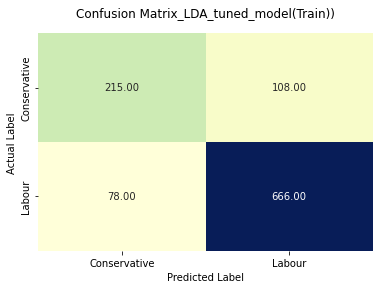

In [88]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,lda_best_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix_LDA_tuned_model(Train))',y=1.05)
plt.show()

### Classification report for LDA tuned model(Train)

In [89]:
print(classification_report(y_train,lda_best_y_train_predict))

              precision    recall  f1-score   support

Conservative       0.73      0.67      0.70       323
      Labour       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067



### Confusion matrix LDA tuned model (Test)

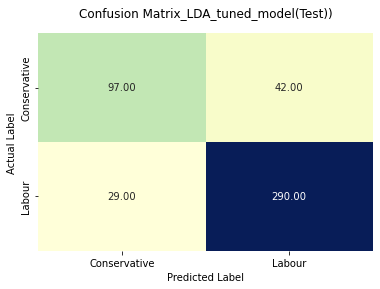

In [90]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,lda_best_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix_LDA_tuned_model(Test))',y=1.05)
plt.show()

### Classification report for LDA tuned model(Test)

In [91]:
print(classification_report(y_test,lda_best_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.77      0.70      0.73       139
      Labour       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458



**Observations from confusion Matrix and Classification report for both Base & Tuned model**

* Both base model and tuned model gives almost same predictions in both test and trained data.Even though we have used different tol value, got the same result.

* Actual vote is for "Conservative" party, there are 42 instances where model predicted that the vote is for "Labour" party in test dataset.

* Actual vote is for "Labour" party, there are 29 instances where model predicted that the vote is for "Conservative" party in test dataset.

* In our business problem accuracy is important. Both base and tuned model gives almost same accuracy in both test and trained data. It shows that model performed similarly at both test & train data. Model is neither a overfit nor a underfit.

* In case of LDA, we can go with base model since it is simple and also gives the same results like tuned model.

### ROC_Curve LDA base model (Train data)

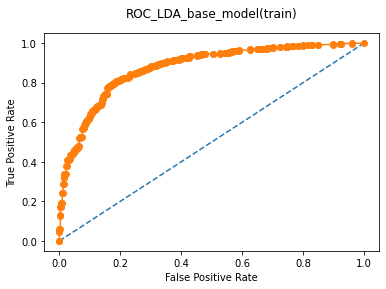

In [92]:
lda_fpr,lda_tpr,tresholds=roc_curve(y_train,lda_y_train_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_fpr,lda_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_LDA_base_model(train)',y=1.05)
plt.show()

### ROC_Curve LDA base model (Test data)

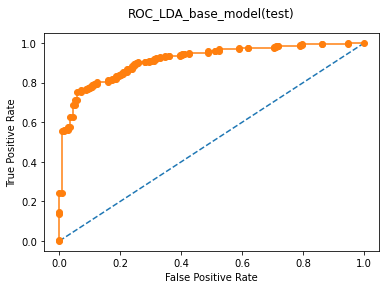

In [93]:
lda_fpr,lda_tpr,tresholds=roc_curve(y_test,lda_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_fpr,lda_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_LDA_base_model(test)',y=1.05)
plt.show()

### ROC_Curve LDA tuned model (Train data)

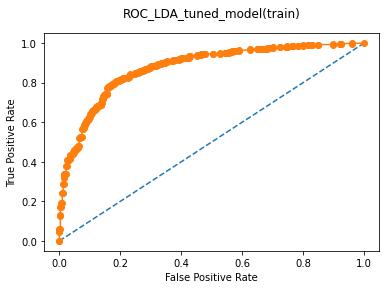

In [94]:
lda_best_fpr,lda_best_tpr,tresholds=roc_curve(y_train,lda_best_y_train_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_best_fpr,lda_best_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_LDA_tuned_model(train)',y=1.05)
plt.show()

### ROC_Curve LDA tuned model (Test data)

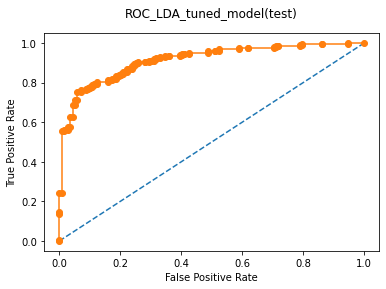

In [95]:
lda_best_fpr,lda_best_tpr,tresholds=roc_curve(y_test,lda_best_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_best_fpr,lda_best_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_LDA_tuned_model(test)',y=1.05)
plt.show()

### Area under the curve

In [96]:
print('Area Under the Curve for Base Model (train data) is',round(roc_auc_score(y_train,lda_y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for Base Model (test data) is',round(roc_auc_score(y_test,lda_y_test_predict_prob[:,1]),2)*100,'%')

print('Area Under the Curve for Tuned Model (train data) is',round(roc_auc_score(y_train,lda_best_y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for Tuned Model (test data) is',round(roc_auc_score(y_test,lda_best_y_test_predict_prob[:,1]),2)*100,'%')

Area Under the Curve for Base Model (train data) is 88.0 %
Area Under the Curve for Base Model (test data) is 91.0 %
Area Under the Curve for Tuned Model (train data) is 88.0 %
Area Under the Curve for Tuned Model (test data) is 91.0 %


In [97]:
from sklearn.neighbors import KNeighborsClassifier

First we can build base model choosing the default values.(n_neighbors =5,weights='uniform',p=2,metric='minkowski'). p = 2 gives us an Euclidean Distance. As it is distance based algorithm, we use scaled data.

In [98]:
knn=KNeighborsClassifier()

In [99]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [100]:
knn_y_train_predict=knn.predict(x_train_scaled)
knn_y_test_predict=knn.predict(x_test_scaled)
knn_y_train_predict_prob=knn.predict_proba(x_train_scaled)
knn_y_test_predict_prob=knn.predict_proba(x_test_scaled)

### Performance check for KNN base model

### Confusion matrix KNN base model(Train)

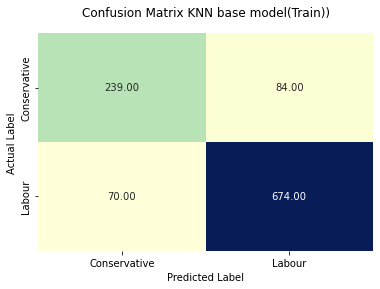

In [101]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,knn_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix KNN base model(Train))',y=1.05)
plt.show()

### Classification report KNN base model(Train)

In [102]:
print(classification_report(y_train,knn_y_train_predict))

              precision    recall  f1-score   support

Conservative       0.77      0.74      0.76       323
      Labour       0.89      0.91      0.90       744

    accuracy                           0.86      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.86      0.85      1067



### Confusion matrix KNN base model(Test)

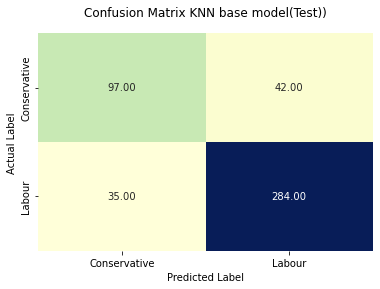

In [103]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,knn_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix KNN base model(Test))',y=1.05)
plt.show()

### Classification report KNN base model(Test)

In [104]:
print(classification_report(y_test,knn_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.73      0.70      0.72       139
      Labour       0.87      0.89      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.80       458
weighted avg       0.83      0.83      0.83       458



**From the above classification reports we can observe that**

The accuracy for train and test data is 86% and 83% respectively.Other metrics like recall,precision and f1-score for both test & train data are almost similar with very least differences.So the model seems a good fit model and performs similar way in both train & test data.

### Model tuning for KNN

### Finding optimal number of K values

Choosing the right k is not easy and subjective. Usually odd number is choosen.

A small k captures too much training noise hence doesnot do well in test data. A very large k does so much smoothening that it doesnot manage to capture the information in the train data sufficiently and hence doesnot do well in test data.

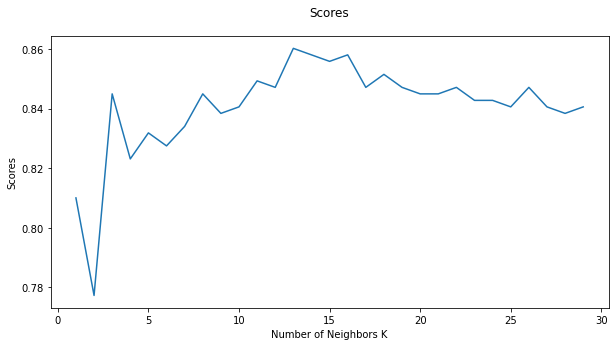

In [105]:
scores=[]
for k in range(1,30):
    knn1=KNeighborsClassifier(n_neighbors=k)
    knn1.fit(x_train_scaled,y_train)
    scores.append(knn1.score(x_test_scaled,y_test))
plt.figure(figsize=(10,5))    
plt.plot(range(1,30),scores);
plt.xlabel('Number of Neighbors K')
plt.ylabel('Scores')
plt.title('Scores',y=1.05)
plt.show()

From the above graph we can observe that model performs well at 13. So, we can try different k value  around 13 like (11,13,15,17) in GridSearchCV

**Initially taking below values for Grid Search Cross Validation**

* n_neighbors = 11,13,15,17 (based on scores graph)
* weights = 'uniform','distance'(trying out giving uniform weights and distance based weights)
* p = 1,2 (p=1 for Manhattan distance, p=2 for eucledian distance)

In [106]:
grid_knn={'n_neighbors':[11,13,15,17],'weights':['uniform','distance'],'p':[1,2]}

In [107]:
knn2=KNeighborsClassifier()

In [108]:
GridSearch_knn = GridSearchCV(estimator = knn2, param_grid = grid_knn, cv =3,scoring='accuracy')

In [109]:
GridSearch_knn.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [11, 13, 15, 17], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [110]:
GridSearch_knn.best_params_

{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}

**Best Parameters for KNN**

* n_neighbors = 15
* weights = 'distance'
* p = 2

In [111]:
knn_best=GridSearch_knn.best_estimator_

In [112]:
knn_best_y_train_predict=knn_best.predict(x_train_scaled)
knn_best_y_test_predict=knn_best.predict(x_test_scaled)
knn_best_y_train_predict_prob=knn_best.predict_proba(x_train_scaled)
knn_best_y_test_predict_prob=knn_best.predict_proba(x_test_scaled)

### Performance check for KNN tuned model

### Confusion matrix KNN tuned model(Train)

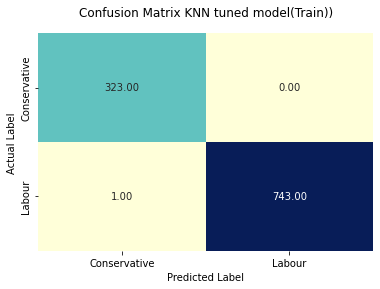

In [113]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,knn_best_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix KNN tuned model(Train))',y=1.05)
plt.show()

### Classification report KNN tuned model(Train)

In [114]:
print(classification_report(y_train,knn_best_y_train_predict))

              precision    recall  f1-score   support

Conservative       1.00      1.00      1.00       323
      Labour       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



### Confusion matrix KNN tuned model(Test)

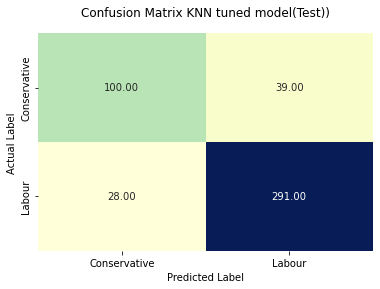

In [115]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,knn_best_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix KNN tuned model(Test))',y=1.05)
plt.show()

### Classification report KNN tuned model(Test)

In [116]:
print(classification_report(y_test,knn_best_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.78      0.72      0.75       139
      Labour       0.88      0.91      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.82      0.82       458
weighted avg       0.85      0.85      0.85       458



The model created based on the best estimated values was over fit model, doesn't perform well in test data. It seems k value is high. Let us try with smaller k values(k=3,5,7)

In [117]:
# Since we already used k=5 in base model 5 is excluded
grid_knn1={'n_neighbors':[3,7],'weights':['uniform','distance'],'p':[1,2]} 

In [118]:
knn3=KNeighborsClassifier()

In [119]:
GridSearch_knn1 = GridSearchCV(estimator = knn3, param_grid = grid_knn1, cv =3,scoring='accuracy')

In [120]:
GridSearch_knn1.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [121]:
GridSearch_knn1.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

**Best Parameters for KNN**

* n_neighbors = 7
* weights = 'distance'
* p = 2

In [122]:
knn_best1=GridSearch_knn1.best_estimator_

In [123]:
GridSearch_knn1.best_estimator_

KNeighborsClassifier(n_neighbors=7, p=1)

In [124]:
knn_best1_y_train_predict=knn_best1.predict(x_train_scaled)
knn_best1_y_test_predict=knn_best1.predict(x_test_scaled)
knn_best1_y_train_predict_prob=knn_best1.predict_proba(x_train_scaled)
knn_best1_y_test_predict_prob=knn_best1.predict_proba(x_test_scaled)

### Confusion matrix KNN tuned model(Train)

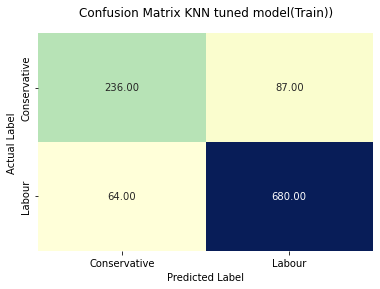

In [125]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,knn_best1_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix KNN tuned model(Train))',y=1.05)
plt.show()

### Classification report KNN tuned model(Train)

In [126]:
print(classification_report(y_train,knn_best1_y_train_predict))

              precision    recall  f1-score   support

Conservative       0.79      0.73      0.76       323
      Labour       0.89      0.91      0.90       744

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



### Confusion matrix KNN tuned model(Test)

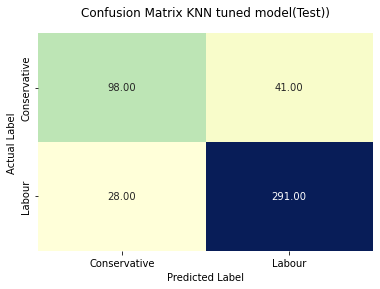

In [127]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,knn_best1_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix KNN tuned model(Test))',y=1.05)
plt.show()

### Classification report KNN tuned model(Test)

In [128]:
print(classification_report(y_test,knn_best1_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.78      0.71      0.74       139
      Labour       0.88      0.91      0.89       319

    accuracy                           0.85       458
   macro avg       0.83      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



**Observations from confusion Matrix and Classification reports for both Base & Tuned model**

* Base model gives the accuracy of 86% and 83% in train and test data respectively.Tuned model gives the accuracy of 86% and 85% in train and test data respectively. It shows that accuracy for test data in tuned model is slightly more when compared to accuracy for test data in base model. Model is neither a overfit nor a underfit.

* In Base model, actual vote is for "Conservative" party, there are 42 instances where model predicted that the vote is for "Labour" party in test dataset.

* In Base model, actual vote is for "Labour" party, there are 35 instances where model predicted that the vote is for "Conservative" party in test dataset.

* In Tuned model, actual vote is for "Conservative" party, there are 41 instances where model predicted that the vote is for "Labour" party in test dataset.

* In Tuned model, actual vote is for "Labour" party, there are 28 instances where model predicted that the vote is for "Conservative" party in test dataset

* In our business problem accuracy is important. Both base and tuned model gives the almost similar accuracy in both test and trained data. Since, the accuracy for test data in tuned model is more when compared to base model we can go with tuned model with k value 7

### ROC_Curve base model (Train data)

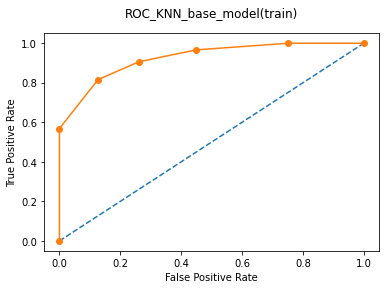

In [129]:
knn_fpr,knn_tpr,tresholds=roc_curve(y_train,knn_y_train_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_fpr,knn_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_KNN_base_model(train)',y=1.05)
plt.show()

### ROC_Curve base model (Test data)

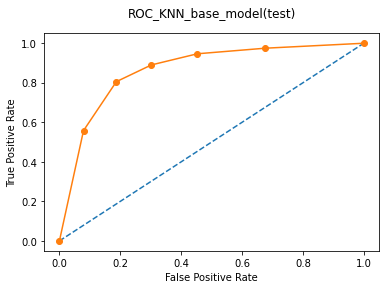

In [130]:
knn_fpr,knn_tpr,tresholds=roc_curve(y_test,knn_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_fpr,knn_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_KNN_base_model(test)',y=1.05)
plt.show()

### ROC_Curve tuned model (Train data)

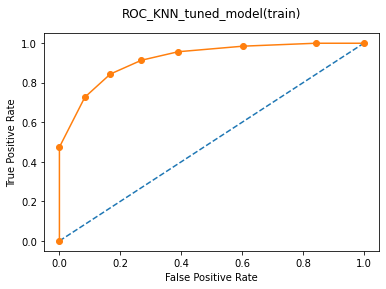

In [131]:
knn_best1_fpr,knn_best1_tpr,tresholds=roc_curve(y_train,knn_best1_y_train_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_best1_fpr,knn_best1_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_KNN_tuned_model(train)',y=1.05)
plt.show()

### ROC_Curve tuned model (Test data)

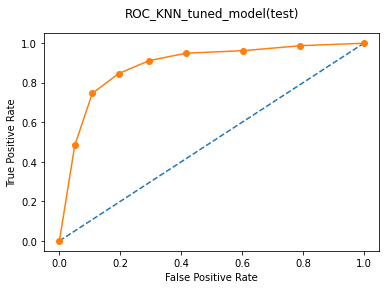

In [132]:
knn_best1_fpr,knn_best1_tpr,tresholds=roc_curve(y_test,knn_best1_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_best1_fpr,knn_best1_tpr,marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_KNN_tuned_model(test)',y=1.05)
plt.show()

### Area under the curve

In [133]:
print('Area Under the Curve for Base Model (train data) is',round(roc_auc_score(y_train,knn_y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for Base Model (test data) is',round(roc_auc_score(y_test,knn_y_test_predict_prob[:,1]),2)*100,'%')

print('Area Under the Curve for Tuned Model (train data) is',round(roc_auc_score(y_train,knn_best1_y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for Tuned Model (test data) is',round(roc_auc_score(y_test,knn_best1_y_test_predict_prob[:,1]),2)*100,'%')

Area Under the Curve for Base Model (train data) is 93.0 %
Area Under the Curve for Base Model (test data) is 87.0 %
Area Under the Curve for Tuned Model (train data) is 92.0 %
Area Under the Curve for Tuned Model (test data) is 89.0 %


### Naïve Bayes Model

Naive Bayes had no hyperparameters to tune, so it usually works based on prior probabilities of the classes in given data.So only base model has been created with default values.

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
nb=GaussianNB()

In [136]:
nb.fit(x_train,y_train.ravel())

GaussianNB()

In [137]:
nb_y_train_predict=nb.predict(x_train)
nb_y_test_predict=nb.predict(x_test)
nb_y_train_predict_prob=nb.predict_proba(x_train)
nb_y_test_predict_prob=nb.predict_proba(x_test)

### Performance check for Naive Bayes model

### Confusion matrix Naive Bayes (Train data)

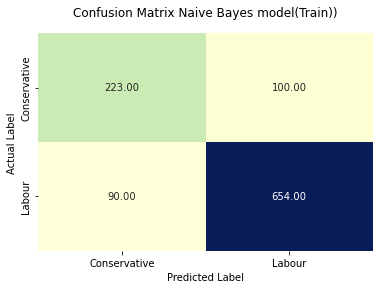

In [138]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,nb_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Naive Bayes model(Train))',y=1.05)
plt.show()

### Classification report Naive Bayes (Train data)

In [139]:
print(classification_report(y_train,nb_y_train_predict))

              precision    recall  f1-score   support

Conservative       0.71      0.69      0.70       323
      Labour       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067



### Confusion matrix Naive Bayes (Test data)

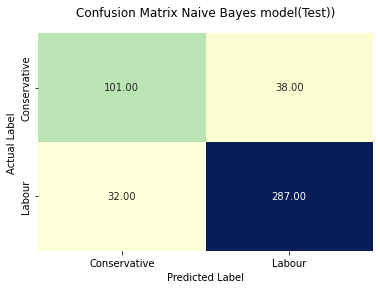

In [140]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,nb_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Naive Bayes model(Test))',y=1.05)
plt.show()

### Classification report Naive Bayes (Test data)

In [141]:
print(classification_report(y_test,nb_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       139
      Labour       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



**From the above classification reports we can observe that**

* The accuracy for train and test data is 82% and 85% respectively.Other metrics like recall,precision and f1-score for both test & train data are within the dffernce of 10%.So the model seems a good fit model and performs similar way in both train & test data.

**Observations from confusion Matrix and Classification report**

* Actual vote is for "Conservative" party, there are 38 instances where model predicted that the vote is for "Labour" party in test dataset.

* Actual vote is for "Labour" party, there are 32 instances where model predicted that the vote is for "Conservative" party in test dataset.

* In our business problem accuracy is important. Model gives the almost similar accuracy in both test and train data, seems a good fit model.

### ROC Curve (Train data)

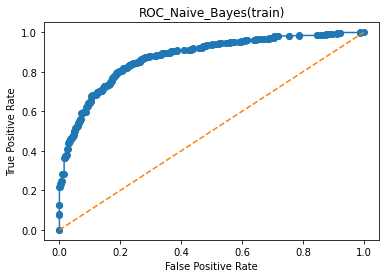

In [142]:
nb_fpr,nb_tpr,treshold=roc_curve(y_train,nb_y_train_predict_prob[:,1],pos_label='Labour')
plt.plot(nb_fpr,nb_tpr,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Naive_Bayes(train)')
plt.show()

### ROC Curve Naive Bayes(Test data)

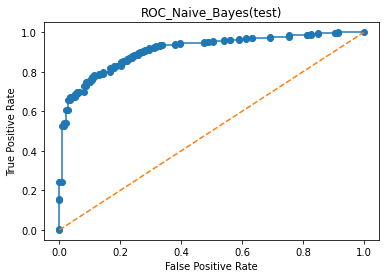

In [143]:
nb_fpr,nb_tpr,treshold=roc_curve(y_test,nb_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(nb_fpr,nb_tpr,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Naive_Bayes(test)')
plt.show()

In [144]:
print('Area Under the Curve for train data is',round(roc_auc_score(y_train,nb_y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for test data is',round(roc_auc_score(y_test,nb_y_test_predict_prob[:,1]),2)*100,'%')

Area Under the Curve for train data is 87.0 %
Area Under the Curve for test data is 91.0 %


### Ada Boosting (Adaptive Boosting)

In Ada-Boost algorithm, we use a default estimator (CART model)

Higher the number of n_estimators gives higher accuracy but also there is a chance for over fitting.So we need to find the optimum value by trying out different values.

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [146]:
n=[5,10,15,20,25,50,75,100,125,150]
acc=[]

In [147]:
for i in n:
    ADB_model = AdaBoostClassifier(n_estimators=i,random_state=1)
    ADB_model.fit(x_train,y_train)
    model_score = ADB_model.score(x_train,y_train)
    acc.append(model_score)

In [148]:
acc

[0.8125585754451734,
 0.8369259606373008,
 0.8275538894095595,
 0.8331771321462043,
 0.8388003748828491,
 0.8444236176194939,
 0.8425492033739457,
 0.8444236176194939,
 0.845360824742268,
 0.8425492033739457]

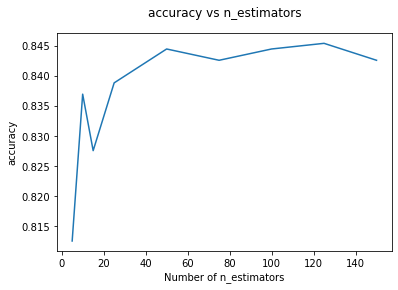

In [149]:
plt.plot(n, acc)
plt.xlabel('Number of n_estimators')
plt.ylabel('accuracy')
plt.title('accuracy vs n_estimators',y=1.05)
plt.show()

From the above graph we can observe that 50 is the optimal value for n_estimators

In [150]:
abcl=AdaBoostClassifier(n_estimators=50,random_state=1)
abcl.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [151]:
abcl_y_train_predict=abcl.predict(x_train)
abcl_y_test_predict=abcl.predict(x_test)
abcl_y_train_predict_prob=abcl.predict_proba(x_train)
abcl_y_test_predict_prob=abcl.predict_proba(x_test)

### Performance check for Ada boost model

### Confusion matrix Ada boost(Train)

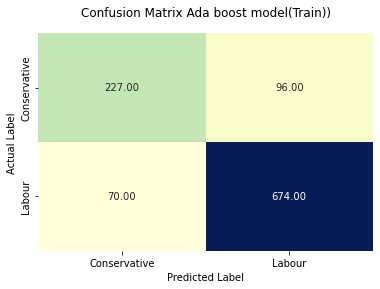

In [152]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,abcl_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Ada boost model(Train))',y=1.05)
plt.show()

### Classification report Ada boost model(Train)

In [153]:
print(classification_report(y_train,abcl_y_train_predict))

              precision    recall  f1-score   support

Conservative       0.76      0.70      0.73       323
      Labour       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



### Confusion matrix Ada boost model (Test)

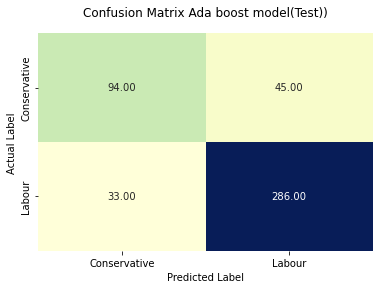

In [154]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,abcl_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Ada boost model(Test))',y=1.05)
plt.show()

In [155]:
print(classification_report(y_test,abcl_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.74      0.68      0.71       139
      Labour       0.86      0.90      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



**Observations from confusion Matrix and Classification report**

* Actual vote is for "Conservative" party, there are 45 instances where model predicted that the vote is for "Labour" party in test dataset.

* Actual vote is for "Labour" party, there are 33 instances where model predicted that the vote is for "Conservative" party in test dataset.

* The accuracy for train and test data is 84% and 83% respectively.Other metrics like recall,precision and f1-score for both test & train data are within the dffernce of 10%.So the model seems a good fit model and performs similar way in both train & test data.

### ROC Curve Ada boost model (Train)

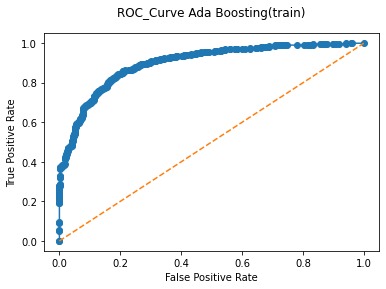

In [156]:
abcl_fpr,abcl_tpr,treshold=roc_curve(y_train,abcl_y_train_predict_prob[:,1],pos_label='Labour')
plt.plot(abcl_fpr,abcl_tpr,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve Ada Boosting(train)',y=1.05)
plt.show()

### ROC Curve Ada boost model (Test)

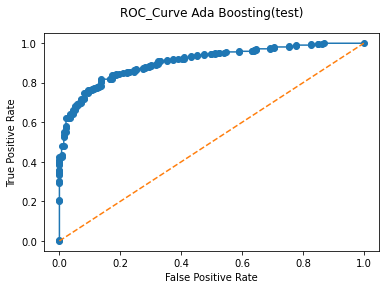

In [157]:
abcl_fpr,abcl_tpr,treshold=roc_curve(y_test,abcl_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(abcl_fpr,abcl_tpr,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve Ada Boosting(test)',y=1.05)
plt.show()

In [158]:
print('Area Under the Curve for train data is',round(roc_auc_score(y_train,abcl_y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for test data is',round(roc_auc_score(y_test,abcl_y_test_predict_prob[:,1]),2)*100,'%')

Area Under the Curve for train data is 90.0 %
Area Under the Curve for test data is 91.0 %


### Gradient Boosting

Running Gradient boosting model with default values

Higher the number of n_estimators gives higher accuracy but also there is a chance for over fitting.So we need to find the optimum value by trying out different values.

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

In [160]:
n=[50,75,100,125,150,175,200]
acc_train=[]
acc_test=[]

In [161]:
for i in n:
    gb1=GradientBoostingClassifier(n_estimators=i,random_state=1)
    gb1.fit(x_train,y_train)
    model_score_train=gb1.score(x_train,y_train)
    model_score_test=gb1.score(x_test,y_test)
    acc_train.append(model_score_train)
    acc_test.append(model_score_test)

In [162]:
 acc_train

[0.865979381443299,
 0.8781630740393627,
 0.887535145267104,
 0.895032802249297,
 0.9053420805998126,
 0.9165885660731021,
 0.9194001874414246]

In [163]:
acc_test

[0.8406113537117904,
 0.8406113537117904,
 0.8384279475982532,
 0.834061135371179,
 0.8296943231441049,
 0.834061135371179,
 0.834061135371179]

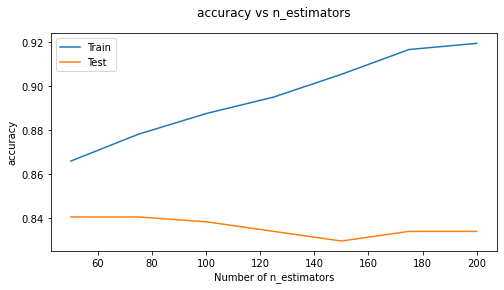

In [164]:
# plot accuracy vs n_estimators
plt.figure(figsize=(8,4))
plt.plot(n, acc_train,label='Train')
plt.plot(n, acc_test,label='Test')
plt.xlabel('Number of n_estimators')
plt.ylabel('accuracy')
plt.title('accuracy vs n_estimators',y=1.05)
plt.legend()
plt.show()

From the aboe graph we can observe that 50 will be the optimal value for n_estimators

In [165]:
gb=GradientBoostingClassifier(n_estimators=50,random_state=1)

In [166]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [167]:
gb_y_train_predict=gb.predict(x_train)
gb_y_test_predict=gb.predict(x_test)
gb_y_train_predict_prob=gb.predict_proba(x_train)
gb_y_test_predict_prob=gb.predict_proba(x_test)

### Performance check for Gradient Boosting model

### Confusion Matrix Gradient boosting (Train)

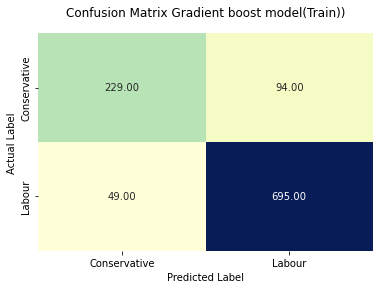

In [168]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,gb_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Gradient boost model(Train))',y=1.05)
plt.show()

### Classification report Gradient boosting (Train)

In [169]:
print(classification_report(y_train,gb_y_train_predict))

              precision    recall  f1-score   support

Conservative       0.82      0.71      0.76       323
      Labour       0.88      0.93      0.91       744

    accuracy                           0.87      1067
   macro avg       0.85      0.82      0.83      1067
weighted avg       0.86      0.87      0.86      1067



### Confusion Matrix Gradient boosting (Test)

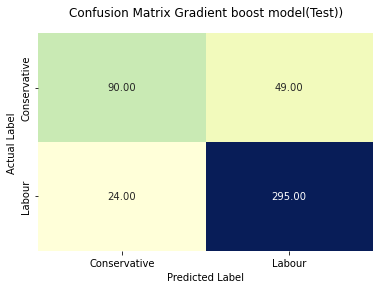

In [170]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,gb_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Gradient boost model(Test))',y=1.05)
plt.show()

### Classification report Gradient boosting (Test)

In [171]:
print(classification_report(y_test,gb_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.79      0.65      0.71       139
      Labour       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.84      0.84      0.84       458



**Observations from confusion Matrix and Classification report**

* Actual vote is for "Conservative" party, there are 49 instances where model predicted that the vote is for "Labour" party in test dataset.

* Actual vote is for "Labour" party, there are 24 instances where model predicted that the vote is for "Conservative" party in test dataset.

* The accuracy for train and test data is 87% and 84% respectively.Other metrics like recall,precision and f1-score for both test & train data are within the differnce of 10%. So the model seems a good fit model and performs similar way in both train & test data.

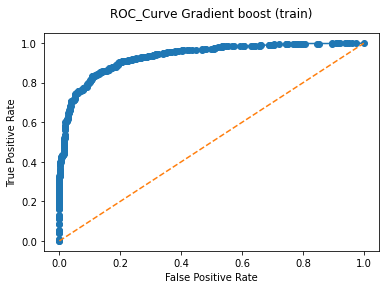

In [172]:
gb_fpr,gb_tpr,treshold=roc_curve(y_train,gb_y_train_predict_prob[:,1],pos_label='Labour')
plt.plot(gb_fpr,gb_tpr,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve Gradient boost (train)',y=1.05)
plt.show()

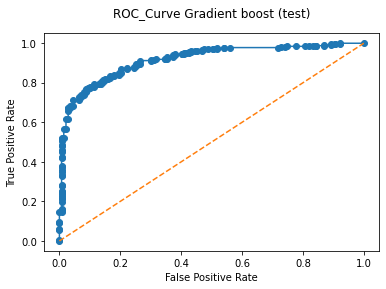

In [173]:
gb_fpr,gb_tpr,treshold=roc_curve(y_test,gb_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(gb_fpr,gb_tpr,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve Gradient boost (test)',y=1.05)
plt.show()

### Area under the curve

In [174]:
print('Area Under the Curve for train data is',round(roc_auc_score(y_train,gb_y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for test data is',round(roc_auc_score(y_test,gb_y_test_predict_prob[:,1]),2)*100,'%')

Area Under the Curve for train data is 93.0 %
Area Under the Curve for test data is 92.0 %


### Bagging (using Random Forest)

In [175]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier()

For Bagging here we use Random Forest as a base estimator and default values for all other parameters.

Higher the number of n_estimators gives higher accuracy but also there is a chance for over fitting.So we need to find the optimum value by trying out different values.

In [176]:
n=[5,10,15,20,25,30,50,75,100]
acc_tr=[]
acc_ts=[]

In [177]:
for i in n:
    bgcl=BaggingClassifier(base_estimator=rfcl,n_estimators=i,random_state=1)
    bgcl.fit(x_train,y_train)
    model_score_tr=bgcl.score(x_train,y_train)
    model_score_ts=bgcl.score(x_test,y_test)
    acc_tr.append(model_score_tr)
    acc_ts.append(model_score_ts)

In [178]:
acc_tr

[0.9587628865979382,
 0.9634489222118088,
 0.9690721649484536,
 0.9709465791940018,
 0.9681349578256795,
 0.9709465791940018,
 0.9746954076850984,
 0.971883786316776,
 0.971883786316776]

In [179]:
acc_ts

[0.8493449781659389,
 0.834061135371179,
 0.8362445414847162,
 0.8362445414847162,
 0.834061135371179,
 0.8318777292576419,
 0.8384279475982532,
 0.8427947598253275,
 0.8427947598253275]

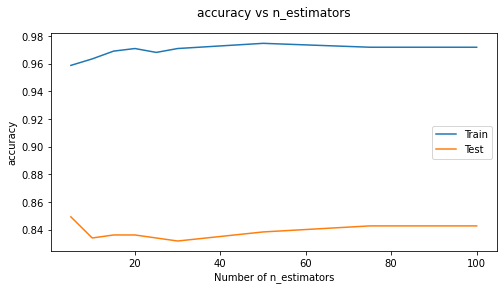

In [180]:
# plot accuracy vs n_estimators
plt.figure(figsize=(8,4))
plt.plot(n, acc_tr,label='Train')
plt.plot(n, acc_ts,label='Test')
plt.xlabel('Number of n_estimators')
plt.ylabel('accuracy')
plt.title('accuracy vs n_estimators',y=1.05)
plt.legend()
plt.show()

From the above plot we can observe that 5 would be optimal value for n_estimators.

In [181]:
bgcl1=BaggingClassifier(base_estimator=rfcl,n_estimators=5,random_state=1)
bgcl1.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=5,
                  random_state=1)

In [182]:
bgcl1_y_train_predict=bgcl1.predict(x_train)
bgcl1_y_test_predict=bgcl1.predict(x_test)
bgcl1_y_train_predict_prob=bgcl1.predict_proba(x_train)
bgcl1_y_test_predict_prob=bgcl1.predict_proba(x_test)

### Performance check for bagging model

### Confusion matrix Bagging model (Train)

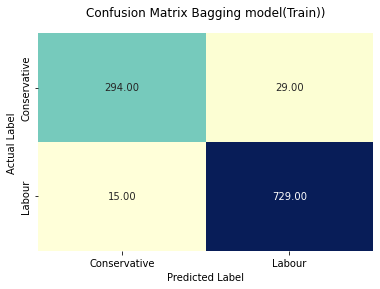

In [183]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,bgcl1_y_train_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Bagging model(Train))',y=1.05)
plt.show()

### Classification report Bagging model (Train)

In [184]:
print(classification_report(y_train,bgcl1_y_train_predict))

              precision    recall  f1-score   support

Conservative       0.95      0.91      0.93       323
      Labour       0.96      0.98      0.97       744

    accuracy                           0.96      1067
   macro avg       0.96      0.95      0.95      1067
weighted avg       0.96      0.96      0.96      1067



### Confusion matrix Bagging model (Test)

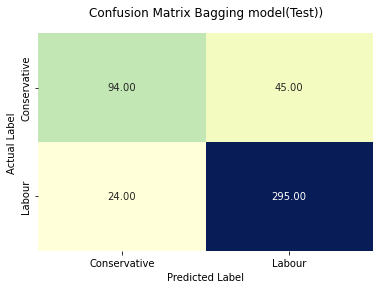

In [185]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,bgcl1_y_test_predict),columns=['Conservative','Labour'],
                         index=['Conservative','Labour']),annot=True, fmt='.2f', cbar=False,cmap='YlGnBu');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Bagging model(Test))',y=1.05)
plt.show()

### Classification report Bagging model (Test)

In [186]:
print(classification_report(y_test,bgcl1_y_test_predict))

              precision    recall  f1-score   support

Conservative       0.80      0.68      0.73       139
      Labour       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



**Observations from confusion Matrix and Classification report**

* Actual vote is for "Conservative" party, there are 45 instances where model predicted that the vote is for "Labour" party in test dataset.

* Actual vote is for "Labour" party, there are 24 instances where model predicted that the vote is for "Conservative" party in test dataset.

* The accuracy for train and test data is 96% and 85% respectively.Although the other metrics like recall,precision and f1-score for both test & train data are within the differnce of 10%, accuracy is not within 10% difference.So the model seems a slightly overfit model.

### ROC Curve (Train data)

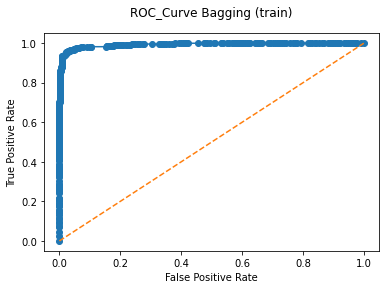

In [187]:
bgcl1_fpr,bgcl1_tpr,treshold=roc_curve(y_train,bgcl1_y_train_predict_prob[:,1],pos_label='Labour')
plt.plot(bgcl1_fpr,bgcl1_tpr,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve Bagging (train)',y=1.05)
plt.show()

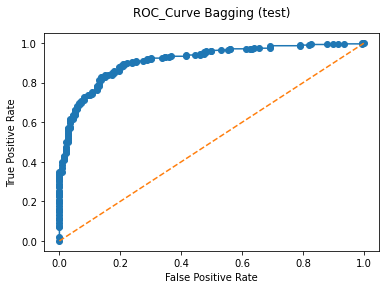

In [188]:
bgcl1_fpr,bgcl1_tpr,treshold=roc_curve(y_test,bgcl1_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(bgcl1_fpr,bgcl1_tpr,marker='o')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve Bagging (test)',y=1.05)
plt.show()

### Area under the curve

In [189]:
print('Area Under the Curve for train data is',round(roc_auc_score(y_train,bgcl1_y_train_predict_prob[:,1]),2)*100,'%')
print('Area Under the Curve for test data is',round(roc_auc_score(y_test,bgcl1_y_test_predict_prob[:,1]),2)*100,'%')

Area Under the Curve for train data is 99.0 %
Area Under the Curve for test data is 91.0 %


### Comparison of various models on test data (using ROC Curve)

The below plot shows the ROC curves for different models on Test dataset. Here I used either base model or tuned model for each algorithm based on its better performance between the two.

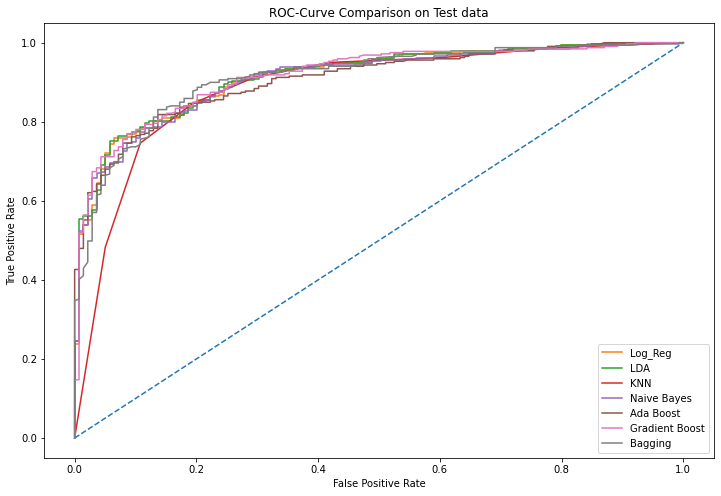

In [190]:
plt.figure(figsize=(12,8))
plt.plot([0,1],[0,1],linestyle='--')
lr_fpr,lr_tpr,tresholds=roc_curve(y_test,y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(lr_fpr,lr_tpr,label='Log_Reg')
lda_fpr,lda_tpr,tresholds=roc_curve(y_test,lda_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(lda_fpr,lda_tpr,label='LDA')
knn_best1_fpr,knn_best1_tpr,tresholds=roc_curve(y_test,knn_best1_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(knn_best1_fpr,knn_best1_tpr,label='KNN')
nb_fpr,nb_tpr,treshold=roc_curve(y_test,nb_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(nb_fpr,nb_tpr,label='Naive Bayes')
abcl_fpr,abcl_tpr,treshold=roc_curve(y_test,abcl_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(abcl_fpr,abcl_tpr,label='Ada Boost')
gb_fpr,gb_tpr,treshold=roc_curve(y_test,gb_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(gb_fpr,gb_tpr,label='Gradient Boost')
bgcl1_fpr,bgcl1_tpr,treshold=roc_curve(y_test,bgcl1_y_test_predict_prob[:,1],pos_label='Labour')
plt.plot(bgcl1_fpr,bgcl1_tpr,label='Bagging')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve Comparison on Test data')
plt.legend(loc='lower right')
plt.show()

Summary of performance metrics for different model on Train & Test dataset has been tabulated in below table considering the best performing models from each algorithm.

In the below table, the value of precision, recall and F1_score for both the parties are given in the order of Conservative & Labour party respectively

In [191]:
models=['Log_Reg(Train)','Log_Reg(Test)','LDA(Train)','LDA(Test)','KNN_Tuned(Train)','KNN_Tuned(Test)','Naive Bayes(Train)',
       'Naive Bayes(Test)','Ada Boost(Train)','Ada Boost(Test)','Gradient Boost(Train)','Gradient Boost(Test)',
       'Bagging(Train)','Bagging(Test)']

In [192]:
Comparison=pd.DataFrame({'Accuracy':[0.83,0.85,0.83,0.84,0.86,0.85,0.82,0.85,0.84,0.83,0.87,0.84,0.96,0.85],
            'AUC':['88%','91%','88%','91%','92%','89%','87%','91%','90%','91%','93%','92%','99%','91%'],
           'Precission':['0.75 & 0.86','0.79 & 0.87','0.73 & 0.86','0.77 & 0.87','0.79 & 0.89','0.78 & 0.88','0.71 & 0.87',
                        '0.76 & 0.88','0.76 & 0.88','0.74 & 0.86','0.82 & 0.88','0.79 & 0.86','0.95 & 0.96','0.80 & 0.87'],
           'Recall':['0.65 & 0.91','0.67 & 0.92','0.67 & 0.90','0.70 & 0.91','0.73 & 0.91','0.71 & 0.91','0.69 & 0.88',
                        '0.73 & 0.90','0.70 & 0.91','0.68 & 0.90','0.71 & 0.93','0.65 & 0.92','0.91 & 0.98','0.68 & 0.92'],
           'F1_Score':['0.70 & 0.88','0.73 & 0.89','0.70 & 0.88','0.73 & 0.89','0.76 & 0.90','0.74 & 0.89','0.70 & 0.87',
                        '0.74 & 0.89','0.73 & 0.89','0.71 & 0.88','0.76 & 0.91','0.71 & 0.89','0.93 & 0.97','0.73 & 0.90']},
                        index=models)

In [193]:
Comparison

,Accuracy,AUC,Precission,Recall,F1_Score
Log_Reg(Train),0.83,88%,0.75 & 0.86,0.65 & 0.91,0.70 & 0.88
Log_Reg(Test),0.85,91%,0.79 & 0.87,0.67 & 0.92,0.73 & 0.89
LDA(Train),0.83,88%,0.73 & 0.86,0.67 & 0.90,0.70 & 0.88
LDA(Test),0.84,91%,0.77 & 0.87,0.70 & 0.91,0.73 & 0.89
KNN_Tuned(Train),0.86,92%,0.79 & 0.89,0.73 & 0.91,0.76 & 0.90
KNN_Tuned(Test),0.85,89%,0.78 & 0.88,0.71 & 0.91,0.74 & 0.89
Naive Bayes(Train),0.82,87%,0.71 & 0.87,0.69 & 0.88,0.70 & 0.87
Naive Bayes(Test),0.85,91%,0.76 & 0.88,0.73 & 0.90,0.74 & 0.89
Ada Boost(Train),0.84,90%,0.76 & 0.88,0.70 & 0.91,0.73 & 0.89
Ada Boost(Test),0.83,91%,0.74 & 0.86,0.68 & 0.90,0.71 & 0.88


**Inferences based on above comparison table and plot are given below**

* Our objective is to predict to which party a voter will vote. So prediction of both classes have equal importance and important metric is accuracy.

* Bagging model capture more information than other model,since it have higher AUC score. Accuracy seems to be high compared to other. But the performance in slightly lesser than recommended (differnce more than 10%). Accuracy in train and test data is 96% and 85%, Seems under performing in test data.

* Performance of Log_Reg,KNN & Naive Bayes models are almost same and gives a similar accuracy of 85% in test data. These models performed almost similar manner in its respective train and test data.

* Performance of LDA and Gradient Boost models are almost same and gives a similar accuracy of 84% in test data. These models performed almost similar manner in its respective train and test data.

* Ada Boost model also performs well with accuracy 80% in test data.This model performed almost similar manner in its respective train and test data.

**Based on our business objective and performances of all models, KNN tuned model suits best for the given business problem. It gives better and stable results and captures reasonable amount of information in both test and train data when compared to other models.**

#### Insights and recommendations

* Voters who have less economic.cond.national score like 1 and 2 are mostly voted for Conservative party about 57% and 54% respectively.

* Voters who have high economic.cond.national score like 3,4 and 5 are mostly voted for Labour party about 67%, 83% and 89% respectively. It seems that voters from well economic background are mostly likely to vote for Labour party

* Conservative party also bags vome votes (Only 10% difference) when compared to Labour party for voters those who have less economic.cond.household score like 1 and 2.

* But in case of voters who have high economic.cond.household score like 3,4 and 5 are mostly voted for Labour party about 69%, 80% and 75% respectively. It seems that voters from well economic background are mostly like to vote for Labour party

* Among voters those who have less Europe score like 1,2,3,4,5 & 6 are mostly voted about 95%, 92%, 89%, 86%, 84% & 83% respectively for Labour party .It seems that voter who have less ‘Eurosceptic’ sentiment are mostly like to vote for Labour party. Voters those who have high Europe score are almost equally voted for both Labour and conservative party.

* Labour party bags more votes in almost all ranges (least to high) of voters with political knowledge